In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import cufflinks as cf
import plotly
import plotly.express as px

from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from datetime import datetime
from sklearn.feature_extraction.text import CountVectorizer
from pandas import DataFrame
from collections import OrderedDict

In [5]:
df = pd.read_csv(r'https://raw.githubusercontent.com/benvictoria21/MachineLearning/master/python-machine-learning%20data/news_articles.csv', encoding="latin", index_col=0)
df = df.dropna()
df.count()

published                  2045
title                      2045
text                       2045
language                   2045
site_url                   2045
main_img_url               2045
type                       2045
label                      2045
title_without_stopwords    2045
text_without_stopwords     2045
hasImage                   2045
dtype: int64

In [6]:
df.head(5)

,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
author,,,,,,,,,,,
Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0


In [7]:
df['type'].unique()

array(['bias', 'conspiracy', 'fake', 'bs', 'satire', 'hate', 'junksci',
       'state'], dtype=object)

In [8]:
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [9]:
df['type'].iplot(kind='hist',
    bins=100,
    xTitle='type',
    linecolor='black',
    yTitle='count',
    title='Types of Articles Distribution')

In [10]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(df['text_without_stopwords'], 20)
common_words_df = DataFrame (common_words,columns=['word','freq'])
fig = px.bar(common_words_df, x='word', y='freq',title='Top 20 words in articles and their frequency')
fig.show()

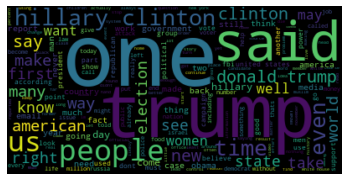

In [11]:
wc = WordCloud()
wc.generate(' '.join(df['text_without_stopwords']))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
fig = px.bar(df, x='hasImage', y='label',title='Articles including images vs Label')
fig.show()

In [13]:
df['site_url'].unique()

array(['100percentfedup.com', '21stcenturywire.com', 'abcnews.com.co',
       'abeldanger.net', 'abovetopsecret.com', 'activistpost.com',
       'addictinginfo.org', 'adobochronicles.com', 'ahtribune.com',
       'allnewspipeline.com', 'americannews.com',
       'americasfreedomfighters.com', 'amren.com', 'amtvmedia.com',
       'awdnews.com', 'barenakedislam.com', 'clickhole.com',
       'coasttocoastam.com', 'corbettreport.com', 'countercurrents.org',
       'counterpunch.org', 'dailywire.com', 'darkmoon.me',
       'davidduke.com', 'davidstockmanscontracorner.com',
       'davidwolfe.com', 'dcclothesline.com', 'defenddemocracy.press',
       'dennismichaellynch.com', 'departed.co', 'der-postillon.com',
       'fromthetrenchesworldreport.com', 'frontpagemag.com',
       'galacticconnection.com', 'globalresearch.ca', 'infowars.com',
       'intrepidreport.com', 'legorafi.fr', 'madworldnews.com',
       'naturalnews.com', 'newstarget.com', 'politicususa.com',
       'presstv.com', 'pre

In [14]:
type_label = {'Real': 0, 'Fake': 1}
df_sources = df[['site_url','label']]
df_sources.label = [type_label[item] for item in df_sources.label] 

In [15]:
val_real=[]
val_fake=[]

for i,row in df_sources.iterrows():
    val = row['site_url']
    if row['label'] == 0:
        val_real.append(val)
    elif row['label']== 1:
        val_fake.append(val)

In [16]:
uniqueValues_real = list(OrderedDict.fromkeys(val_real)) 
uniqueValues_real

['100percentfedup.com',
 'addictinginfo.org',
 'dailywire.com',
 'davidduke.com',
 'fromthetrenchesworldreport.com',
 'frontpagemag.com',
 'newstarget.com',
 'politicususa.com',
 'presstv.com',
 'presstv.ir',
 'prisonplanet.com',
 'proudemocrat.com',
 'redstatewatcher.com',
 'returnofkings.com',
 'washingtonsblog.com',
 'westernjournalism.com',
 'whydontyoutrythis.com',
 'wnd.com']

In [17]:
uniqueValues_fake = list(OrderedDict.fromkeys(val_fake)) 
uniqueValues_fake

['21stcenturywire.com',
 'abcnews.com.co',
 'abeldanger.net',
 'abovetopsecret.com',
 'activistpost.com',
 'adobochronicles.com',
 'ahtribune.com',
 'allnewspipeline.com',
 'americannews.com',
 'americasfreedomfighters.com',
 'amren.com',
 'amtvmedia.com',
 'awdnews.com',
 'barenakedislam.com',
 'clickhole.com',
 'coasttocoastam.com',
 'corbettreport.com',
 'countercurrents.org',
 'counterpunch.org',
 'darkmoon.me',
 'davidduke.com',
 'davidstockmanscontracorner.com',
 'davidwolfe.com',
 'dcclothesline.com',
 'defenddemocracy.press',
 'dennismichaellynch.com',
 'departed.co',
 'der-postillon.com',
 'fromthetrenchesworldreport.com',
 'frontpagemag.com',
 'galacticconnection.com',
 'globalresearch.ca',
 'infowars.com',
 'intrepidreport.com',
 'legorafi.fr',
 'madworldnews.com',
 'naturalnews.com',
 'newstarget.com',
 'presstv.ir',
 'prisonplanet.com',
 'projectveritas.com',
 'returnofkings.com',
 'shiftfrequency.com',
 'thedailysheeple.com',
 'theeconomiccollapseblog.com',
 'thefreethoug

In [18]:
real_set = set(uniqueValues_real) 
fake_set = set(uniqueValues_fake) 
  
print(real_set & fake_set)

{'frontpagemag.com', 'returnofkings.com', 'westernjournalism.com', 'prisonplanet.com', 'fromthetrenchesworldreport.com', 'newstarget.com', 'washingtonsblog.com', 'davidduke.com', 'presstv.ir'}


In [19]:
type1 = {'bias': 0, 'conspiracy': 1,'fake': 2,'bs': 3,'satire': 4, 'hate': 5,'junksci': 6, 'state': 7}
df.type = [type1[item] for item in df.type]

In [20]:
def plot_bar(df, feat_x, feat_y, normalize=True):
    """ Plot with vertical bars of the requested dataframe and features"""
    
    ct = pd.crosstab(df[feat_x], df[feat_y])
    if normalize == True:
        ct = ct.div(ct.sum(axis=1), axis=0)
    return ct.plot(kind='bar', stacked=True)

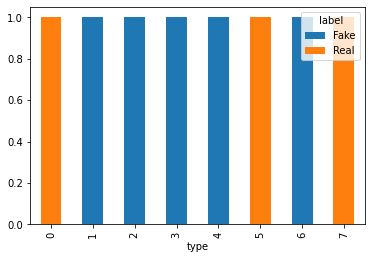

In [21]:
plot_bar(df,'type' , 'label')
plt.show()

In [22]:
df1 = df.sample(frac=1)
df1.head()

,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
author,,,,,,,,,,,
Alex Ansary,2016-11-07T20:01:08.838+02:00,janet reno first female us attorney general di...,las vegas may become the new amsterdam \nhigh...,english,amtvmedia.com,http://www.amtvmedia.com/wp-content/uploads/20...,3,Fake,janet reno first female us attorney general dies,las vegas may become new amsterdam high times ...,1.0
No Author,2016-11-21T21:18:43.762+02:00,democratic congressman threatens violence if g...,just a few days after launching into a minute ...,english,dailywire.com,http://www.dailywire.com/sites/default/files/s...,0,Real,democratic congressman threatens violence gop ...,days launching minute concertwrecking rant dec...,1.0
Larry Gallo,2016-10-26T22:46:36.960+03:00,no title,many of us do not share donald trumps past val...,english,westernjournalism.com,http://static.westernjournalism.com/wp-content...,0,Real,title,goodbye trash,1.0
Steve Watson,2016-10-27T18:25:45.910+03:00,trump warns of vote flipping on machines,wikileaks email clinton operative thinks black...,english,infowars.com,http://hw.infowars.com/wp-content/uploads/2016...,1,Fake,three quarters americans oppose gun control,hillary real christian says michael moore docu...,1.0
Fiona Miller,2016-10-28T00:03:00.000+03:00,vitamin d deficiency dirty air doubles your ri...,wikileaks hillary revelations the media wont ...,english,infowars.com,http://hw.infowars.com/wp-content/uploads/2015...,1,Fake,trump supporters fighting rigged system,exclusive dem senators private email hacked dc...,1.0


In [23]:
y = df1.type

x = df1.loc[:,['site_url','text_without_stopwords']]
x['source'] = x["site_url"].astype(str) +" "+ x["text_without_stopwords"] 
x = x.drop(['site_url','text_without_stopwords'],axis=1)
x = x.source

In [24]:
y = df1.type

x = df1.loc[:,['site_url','text_without_stopwords']]
x['source'] = x["site_url"].astype(str) +" "+ x["text_without_stopwords"] 
x = x.drop(['site_url','text_without_stopwords'],axis=1)
x = x.source

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

tfidf_vect = TfidfVectorizer(stop_words = 'english')
tfidf_train = tfidf_vect.fit_transform(x_train)
tfidf_test = tfidf_vect.transform(x_test)
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vect.get_feature_names())

In [26]:
tfidf_vect

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [27]:
tfidf_train.shape

(1431, 39210)

In [28]:
Adab = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10),n_estimators=5,random_state=1)
Adab.fit(tfidf_train, y_train)
y_pred3 = Adab.predict(tfidf_test)
ABscore = metrics.accuracy_score(y_test,y_pred3)
print("accuracy: %0.3f" %ABscore)

accuracy: 0.959


In [29]:
Rando = RandomForestClassifier(n_estimators=100,random_state=0)
Rando.fit(tfidf_train,y_train)
y_pred1 = Rando.predict(tfidf_test)
RFscore = metrics.accuracy_score(y_test,y_pred1)
print("accuracy:  %0.3f" %RFscore)

accuracy:  0.849
